# Code to plot performance of classifier over time

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from os.path import join
from matplotlib import colors

In [6]:
# helper function
def csv2array(file):
    """
    Read in CSV file and return values as numpy array
    """
    with open(file) as csvfile:
        d = np.asarray(list(csv.reader(csvfile))).astype(np.float)
    return(d)

In [7]:
# Import files
base_dir = 'plotdata'
self_acc = csv2array(join(base_dir, 'self_indiv_acc.csv'))
xtic = csv2array(join(base_dir,'self_xtics.csv'))
a1 = csv2array(join(base_dir, 'self_sig_acc1.csv'))
a2 = csv2array(join(base_dir, 'self_sig_acc2.csv'))
a3 = csv2array(join(base_dir, 'self_sig_acc3.csv'))
a4 = csv2array(join(base_dir, 'self_sig_acc4.csv'))
a5 = csv2array(join(base_dir, 'self_sig_acc5.csv'))
x1 = csv2array(join(base_dir, 'self_sig_x1.csv'))
x2 = csv2array(join(base_dir, 'self_sig_x2.csv'))
x3 = csv2array(join(base_dir, 'self_sig_x3.csv'))
x4 = csv2array(join(base_dir, 'self_sig_x4.csv'))
x5 = csv2array(join(base_dir, 'self_sig_x5.csv'))
self_sig_clusters = [[x1,a1], [x2,a2], [x3,a3], [x4,a4], [x5,a5]]
other_acc = csv2array(join(base_dir, 'other_indiv_acc.csv'))
xtic = csv2array(join(base_dir,'other_xtics.csv'))
a1 = csv2array(join(base_dir, 'other_sig_acc1.csv'))
a2 = csv2array(join(base_dir, 'other_sig_acc2.csv'))
a3 = csv2array(join(base_dir, 'other_sig_acc3.csv'))
a4 = csv2array(join(base_dir, 'other_sig_acc4.csv'))
a5 = csv2array(join(base_dir, 'other_sig_acc5.csv'))
a6 = csv2array(join(base_dir, 'other_sig_acc6.csv'))
a7 = csv2array(join(base_dir, 'other_sig_acc7.csv'))
a8 = csv2array(join(base_dir, 'other_sig_acc8.csv'))
x1 = csv2array(join(base_dir, 'other_sig_x1.csv'))
x2 = csv2array(join(base_dir, 'other_sig_x2.csv'))
x3 = csv2array(join(base_dir, 'other_sig_x3.csv'))
x4 = csv2array(join(base_dir, 'other_sig_x4.csv'))
x5 = csv2array(join(base_dir, 'other_sig_x5.csv'))
x6 = csv2array(join(base_dir, 'other_sig_x6.csv'))
x7 = csv2array(join(base_dir, 'other_sig_x7.csv'))
x8 = csv2array(join(base_dir, 'other_sig_x8.csv'))
other_sig_clusters = [[x1,a1], [x2,a2], [x3,a3], [x4,a4], [x5,a5], [x6,a6], [x7,a7], [x8,a8]]

/var/folders/36/7rzmt21j543cwpyfdh_bx6980000gp/T/ipykernel_26911/548422838.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  d = np.asarray(list(csv.reader(csvfile))).astype(np.float)


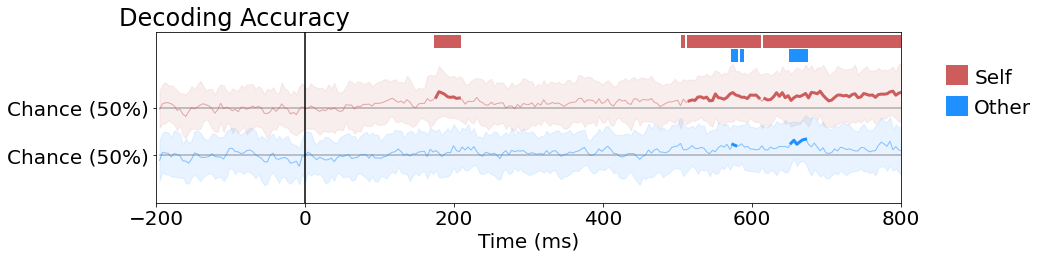

In [54]:
# generate figure
plt.figure(figsize=(15,4), dpi=72)
plt.rcParams.update({'font.size':20})
plt.rcParams.update({'legend.handlelength':.1})
A = self_acc
B = other_acc
nsub, npnt = A.shape

N = 256
vals = np.ones((N,4))
vals[:,0] = np.linspace(0/256, 1, N)
vals[:,1] = np.linspace(24/256, 1, N)
vals[:,2] = np.linspace(24/256, 1, N)
newcmp = colors.ListedColormap(vals)

color_shuffle = np.arange(37)*5
np.random.shuffle(color_shuffle)

top_y = .4
mid_y = .3
top_adj = top_y - .5
mid_adj = mid_y - .5

A_mean = np.mean(A,0) + top_adj
A_sd = np.std(A,0)
A_upper = A_mean + A_sd
A_lower = A_mean - A_sd
B_mean = np.mean(B,0) + mid_adj
B_sd = np.std(B,0)
B_upper = B_mean + B_sd
B_lower = B_mean - B_sd

# plot lines
plt.plot([xtic[0][0],xtic[0][-1]],[top_y, top_y],'-',color='dimgray', alpha=.5)
plt.plot([xtic[0][0],xtic[0][-1]],[mid_y, mid_y],'-',color='dimgray', alpha=.5)
plt.fill_between(xtic[0],A_upper,A_lower,color='indianred', alpha=.1)
plt.fill_between(xtic[0],B_upper,B_lower,color='dodgerblue', alpha=.1)

plt.plot(xtic[0],np.mean(A,0)+top_adj,'-', color='indianred',linewidth=1,alpha=.5)
plt.plot(xtic[0],np.mean(B,0)+mid_adj,'-', color='dodgerblue',linewidth=1,alpha=.5)

# add rasters
noleg = True
for sc in self_sig_clusters:
    x, a = sc
    if noleg:
        plt.plot(x[0],a[0]+top_adj,'-',linewidth=3, color='indianred', label='Self')
        noleg = False
    else:
        plt.plot(x[0],a[0]+top_adj,'-',linewidth=3, color='indianred')
    for xi in x[0]:
        plt.plot([xi,xi],[.53,.55],'-',linewidth=4,color='indianred')
        
noleg = True
for sc in other_sig_clusters:
    x, a = sc
    if noleg:
        plt.plot(x[0],a[0]+mid_adj,'-',linewidth=3, color='dodgerblue', label='Other')
        noleg = False
    else:
        plt.plot(x[0],a[0]+mid_adj,'-',linewidth=3, color='dodgerblue')
    for xi in x[0]:
        plt.plot([xi,xi],[.5,.52],'-',linewidth=4,color='dodgerblue')
        
# make time = 0
plt.plot([0,0],[.2,.58],'-k')

plt.xlim((-200,800))
plt.ylim((0.2,0.56))
plt.xlabel('Time (ms)')
plt.yticks([],[])
plt.yticks([mid_y,top_y],['Chance (50%)','Chance (50%)'])
plt.title('Decoding Accuracy', loc='left', x=-.05)
leg = plt.legend(bbox_to_anchor=(1.05, .9), loc='upper left', frameon=False)
leg.get_lines()[0].set_linewidth(20)
leg.get_lines()[1].set_linewidth(20)
plt.tight_layout()
plt.savefig('svm_self_other.png', facecolor='white')
plt.show()